---

# Combined features Based Classification

---


In [98]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

## Load dataset

In [107]:
Xa = np.load('../dataset/counts.npy')
Xb = np.load('../dataset/slopes.npy')
Xc = np.load('../dataset/stds.npy')
y = np.load('../dataset/labels.npy')
classes = np.load('../dataset/mappings.npy')

In [108]:
X = np.stack((Xa, Xb, Xc), axis=-1)

In [109]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (36262, 73, 3)
y shape: (36262, 40)


## Train-test split

In [126]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Model

In [150]:
x_input = keras.layers.Input(shape=(X.shape[1], X.shape[2]))

In [151]:
x = keras.layers.Conv1D(32, 5, activation='relu', padding='same')(x_input)
x = keras.layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling1D(pool_size=2)(x)
x = keras.layers.Dropout(0.25)(x)

x = keras.layers.Conv1D(32, 5, activation='relu', padding='same')(x_input)
x = keras.layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling1D(pool_size=2)(x)
x = keras.layers.Dropout(0.25)(x)

x = keras.layers.Conv1D(128, 3, activation='relu', padding='same')(x)
x = keras.layers.Conv1D(128, 3, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling1D(pool_size=2)(x)
x = keras.layers.Dropout(0.25)(x)

In [152]:
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(64, activation='relu')(x)

In [153]:
output = keras.layers.Dense(y.shape[1], activation='softmax')(x)

model = keras.models.Model(inputs=x_input, outputs=output)

In [154]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 73, 3)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_51 (Conv1D)              │ (None, 73, 32)         │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_52 (Conv1D)              │ (None, 73, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_23 (MaxPooling1D) │ (None, 36, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 36, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_53 (Conv1D)              │ (None, 36, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_54 (Conv1D)              │ (None, 36, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_24 (MaxPooling1D) │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 40)             │         2,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 718,632 (2.74 MB)

 Trainable params: 718,632 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

## Train

In [156]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8522 - loss: 0.4511 - val_accuracy: 0.7764 - val_loss: 0.7856
Epoch 2/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8608 - loss: 0.4413 - val_accuracy: 0.7847 - val_loss: 0.7538
Epoch 3/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8623 - loss: 0.4303 - val_accuracy: 0.7869 - val_loss: 0.7519
Epoch 4/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8559 - loss: 0.4422 - val_accuracy: 0.7830 - val_loss: 0.7775
Epoch 5/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8583 - loss: 0.4381 - val_accuracy: 0.7823 - val_loss: 0.7715
Epoch 6/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8638 - loss: 0.4242 - val_accuracy: 0.7801 - val_loss: 0.7873
Epoch 7/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8618 - loss: 0.4238 - val_accuracy: 0.7814 - val_loss: 0.7735
Epoch 8/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8601 - loss: 0.4302 - val_accuracy: 0.

In [157]:
# Save the model
model.save('../models/combined_model.keras')

## Test

In [158]:
# Load the arohana-avarohana model
model = keras.models.load_model('../models/combined_model.keras')

In [159]:
loss, accuracy = model.evaluate(X_test, y_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7839 - loss: 0.8433


In [160]:
print(f'Test accuracy: {round(accuracy * 100, 2)}')

Test accuracy: 78.29


In [161]:
y_pred = model.predict(X_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [162]:
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='macro')
print(f'f1 score: {f1}')

f1 score: 0.7733761803963259


In [163]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

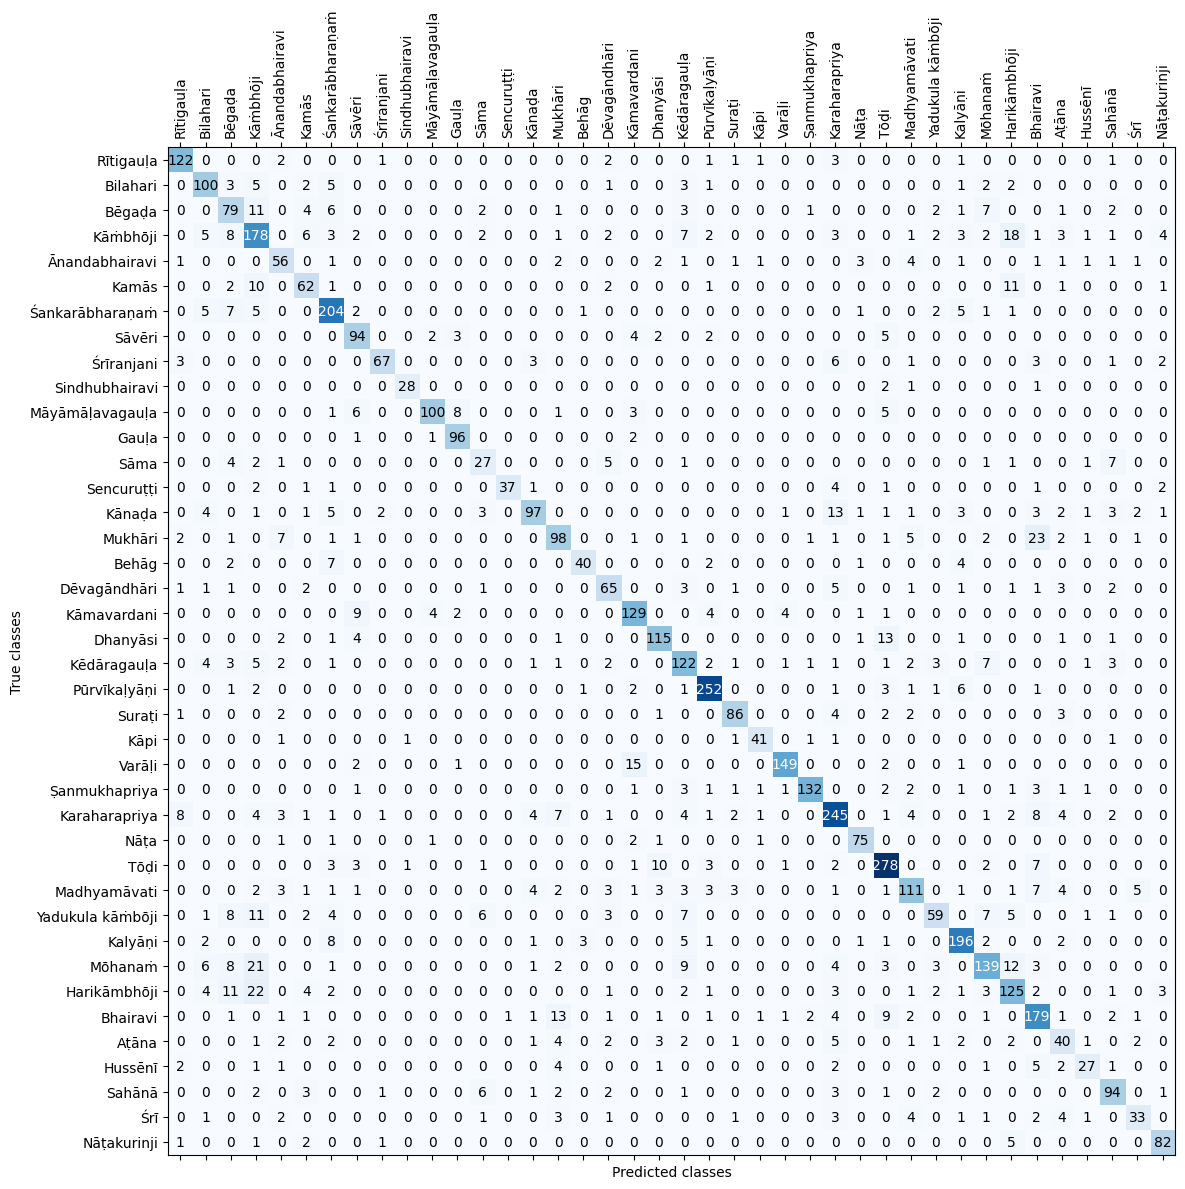

In [164]:
fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.matshow(cm, cmap=plt.cm.Blues)

ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)

ax.set_xlabel('Predicted classes')
ax.set_ylabel('True classes')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'black' if cm[i, j] < max(cm.flatten()) / 2 else 'white'
        ax.text(j, i, cm[i, j], ha='center', va='center', color=color)

plt.savefig('../plots/confusion_matrix_combined.png', dpi=300)
plt.tight_layout()
plt.show()

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                  precision    recall  f1-score   support

       Rītigauḷa       0.87      0.90      0.88       135
        Bilahari       0.75      0.80      0.78       125
          Bēgaḍa       0.57      0.66      0.61       120
        Kāṁbhōji       0.62      0.70      0.66       255
  Ānandabhairavi       0.65      0.72      0.68        78
           Kamās       0.67      0.68      0.68        91
 Śankarābharaṇaṁ       0.78      0.87      0.83       234
          Sāvēri       0.75      0.84      0.79       112
      Śrīranjani       0.92      0.78      0.84        86
  Sindhubhairavi       0.93      0.88      0.90        32
 Māyāmāḷavagauḷa       0.93      0.81      0.86       124
           Gauḷa       0.87      0.96      0.91       100
            Sāma       0.55      0.54      0.55        50
      Sencuruṭṭi       0.97      0.74      0.84        50
          Kānaḍa       0.84      0.67      0.75       145
         Mukhāri       0.69   

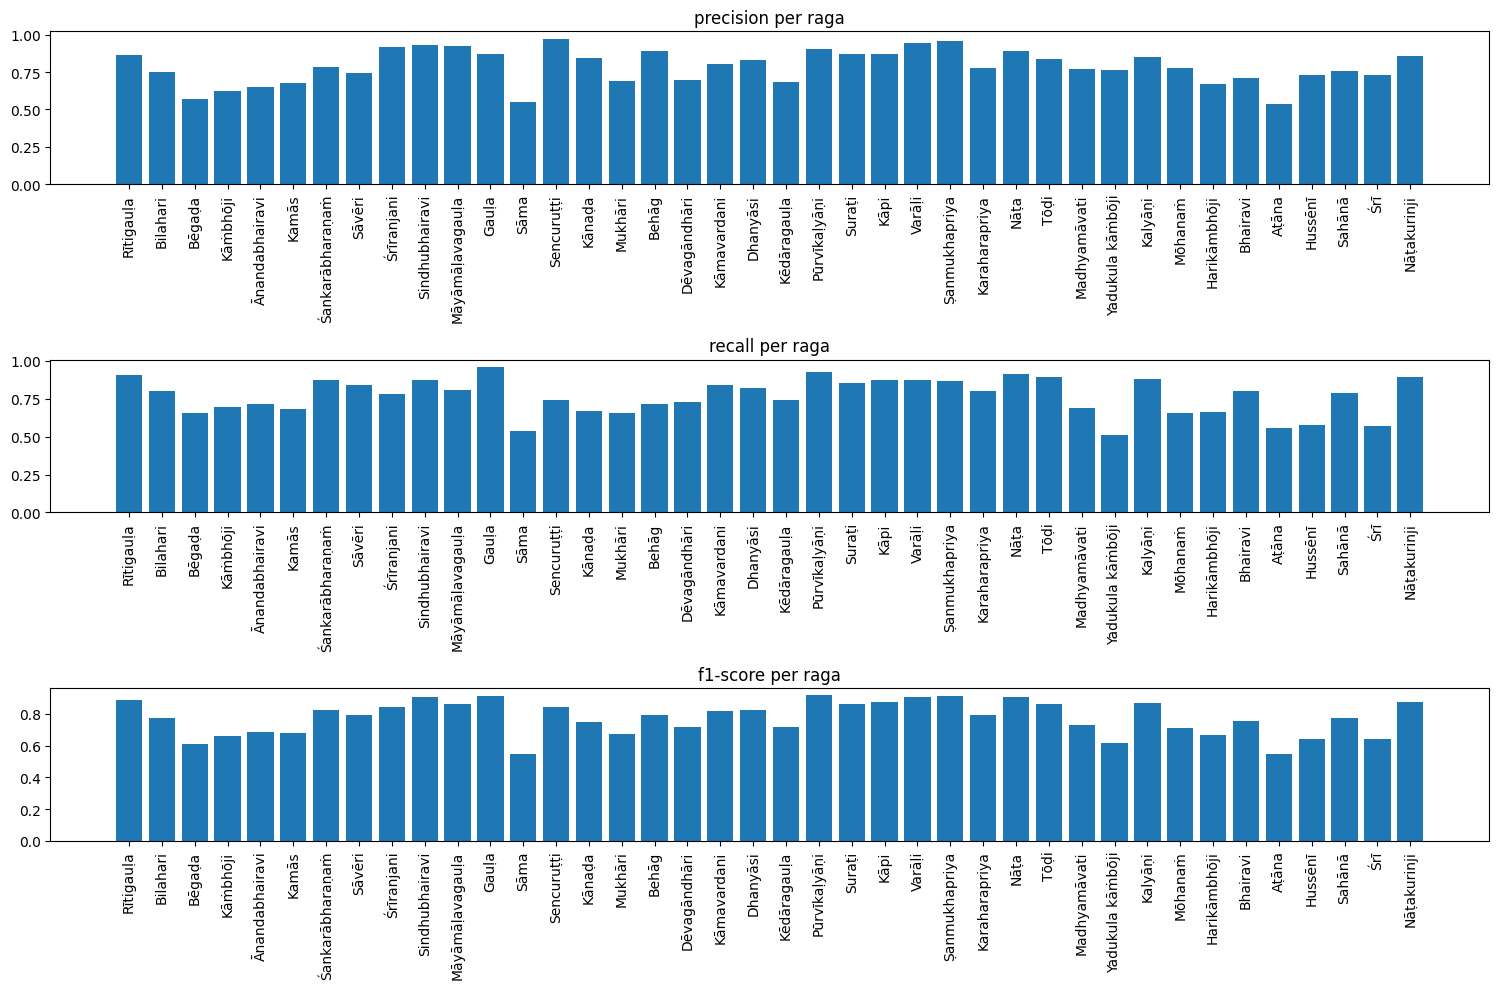

In [165]:
from sklearn.metrics import classification_report

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
print(classification_report(y_true_classes, y_pred_classes, target_names=classes))

# Plot precision, recall and f1-score for each class
metrics = ['precision', 'recall', 'f1-score']
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(3, 1, i+1)
    values = [report[raga][metric] for raga in classes]
    plt.bar(classes, values)
    plt.title(f'{metric} per raga')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../plots/metrics_per_class.png', dpi=300)
plt.show()